# Base
## Estimation of Obesity Levels Based On Eating Habits and Physical Condition

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

## Perguntas?
- Metas mínimas para manter qualidade de vida (atividade física, alimentação, consumo de bebidas, etc)
- Quais fatores mais contribuem para o desenvolvimento da obesidade (por exemplo, histórico familiar, consumo de alimentos calóricos, ou hábitos de transporte)?
- Identificar grupos padrões de comportamento similares em relação à alimentação, atividade física, uso de tecnologia, nível de obesidade 

### Dicionario:

- Gender: Gênero do indivíduo.
- Age: Idade do indivíduo.
- Height: Altura do indivíduo (em metros).
- Weight: Peso do indivíduo (em quilogramas).
- FAVC: Frequent consumption of high caloric food (Consumo frequente de alimentos calóricos).
- FCVC: Frequency of consumption of vegetables (Frequência de consumo de vegetais).
- NCP: Number of main meals per day (Número de refeições principais por dia).
- CAEC: Consumption of food between meals (Consumo de alimentos entre as refeições).
- SMOKE: Smoking habit (Hábito de fumar).
- CH2O: Daily water consumption (Consumo diário de água).
- SCC: Self-control of calorie intake (Controle próprio de ingestão calórica).
- FAF: Physical activity frequency (Frequência de atividade física).
- TUE: Time spent using electronic devices (Tempo de uso de dispositivos eletrônicos).
- CALC: Alcohol consumption frequency (Frequência de consumo de álcool).
- MTRANS: Mode of transportation (Modo de transporte).
- NObeyesdad: Obesity level (Nível de obesidade).

## Importando bibliotecas e base de dados

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [251]:
df = pd.read_csv('../projeto_datasicence_coderhouse/dados/ObesityDataSet_raw_and_data_sinthetic.csv')
df.reset_index(drop=False, inplace=True)
df.rename(columns={'index': 'ID'}, inplace=True)
df['ID'] = df['ID'].astype(str)
df

,ID,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Data Wrangling

In [252]:
print(df.isnull().sum())
print(df.describe())

ID                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.00000

In [253]:
df.loc[1]

ID                                                    1
Gender                                           Female
Age                                                21.0
Height                                             1.52
Weight                                             56.0
family_history_with_overweight                      yes
FAVC                                                 no
FCVC                                                3.0
NCP                                                 3.0
CAEC                                          Sometimes
SMOKE                                               yes
CH2O                                                3.0
SCC                                                 yes
FAF                                                 3.0
TUE                                                 0.0
CALC                                          Sometimes
MTRANS                            Public_Transportation
NObeyesdad                                Normal

In [254]:
### Transformando Variáveis Qualitativas em Quantitativas

df['Smoker'] = df['SMOKE'].map({'no': 0, 'yes': 1})
df['Alcohol'] = df['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df['Food Bt Meals'] = df['CAEC'].map({'no': 3, 'Sometimes': 2, 'Frequently': 1, 'Always': 0})
df['Mobility'] = df['MTRANS'].map({'Bike': 0, 'Walking': 0, 'Public_Transportation': 0.5, 'Automobile': 1, 'Motorbike': 1}) # nível de atividade física para deslocamento
df['Obesity F'] = df['family_history_with_overweight'].map({'no': 0, 'yes': 1})
df['Bad Food'] = df['FAVC'].map({'no': 0, 'yes': 1}) # "Frequent consumption of high caloric food between meals"
df['Calories Control'] = df['SCC'].map({'no': 1, 'yes': 0}) # "Self control of eating habits"
df['FAF'] = df['FAF'] * - 1 # O valor é negativo, pois a ideia é que a atividade física seja inversamente proporcional à obesidade
df['Habits'] = sum([df['FCVC'], df['NCP'], df['CH2O'], df['FAF'], df['TUE'], df['Alcohol'], df['Smoker'], df['Food Bt Meals'], df['Mobility'], df['Obesity F'], df['Bad Food'], df['Calories Control']]) # aqui vamos somar todas as variáveis continuas que representam hábitos do cotidiano
df.head()

,ID,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,MTRANS,NObeyesdad,Smoker,Alcohol,Food Bt Meals,Mobility,Obesity F,Bad Food,Calories Control,Habits
0,0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,...,Public_Transportation,Normal_Weight,0,0,2,0.5,1,0,1,12.5
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,...,Public_Transportation,Normal_Weight,1,1,2,0.5,1,0,0,11.5
2,2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,...,Public_Transportation,Normal_Weight,0,2,2,0.5,1,0,1,12.5
3,3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,...,Walking,Overweight_Level_I,0,2,2,0.0,0,0,1,11.0
4,4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,...,Public_Transportation,Overweight_Level_II,0,1,2,0.5,0,0,1,9.5


In [255]:
# Normalizando as variáveis contínuas
continuous_vars = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Alcohol', 'Smoker', 'Food Bt Meals', 'Mobility', 'Obesity F', 'Bad Food', 'Calories Control']
scaler = MinMaxScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

# Recalculando a coluna 'Habits' com as variáveis normalizadas
df['Habits'] = df[continuous_vars].sum(axis=1)
df.head()

,ID,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,MTRANS,NObeyesdad,Smoker,Alcohol,Food Bt Meals,Mobility,Obesity F,Bad Food,Calories Control,Habits
0,0,Female,21.0,1.62,64.0,yes,no,0.5,0.666667,Sometimes,...,Public_Transportation,Normal_Weight,0.0,0.000000,0.666667,0.5,1.0,0.0,1.0,6.333333
1,1,Female,21.0,1.52,56.0,yes,no,1.0,0.666667,Sometimes,...,Public_Transportation,Normal_Weight,1.0,0.333333,0.666667,0.5,1.0,0.0,0.0,6.166667
2,2,Male,23.0,1.80,77.0,yes,no,0.5,0.666667,Sometimes,...,Public_Transportation,Normal_Weight,0.0,0.666667,0.666667,0.5,1.0,0.0,1.0,6.333333
3,3,Male,27.0,1.80,87.0,no,no,1.0,0.666667,Sometimes,...,Walking,Overweight_Level_I,0.0,0.666667,0.666667,0.0,0.0,0.0,1.0,4.833333
4,4,Male,22.0,1.78,89.8,no,no,0.5,0.000000,Sometimes,...,Public_Transportation,Overweight_Level_II,0.0,0.333333,0.666667,0.5,0.0,0.0,1.0,4.500000


## EDA

In [256]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.313,6.346,14.00,19.947,22.778,26.000,61.000
Height,2111.0,1.702,0.093,1.45,1.630,1.700,1.768,1.980
Weight,2111.0,86.586,26.191,39.00,65.473,83.000,107.431,173.000
FCVC,2111.0,0.710,0.267,0.00,0.500,0.693,1.000,1.000
NCP,2111.0,0.562,0.259,0.00,0.553,0.667,0.667,1.000
CH2O,2111.0,0.504,0.306,0.00,0.292,0.500,0.739,1.000
FAF,2111.0,0.663,0.284,0.00,0.444,0.667,0.958,1.000
TUE,2111.0,0.329,0.304,0.00,0.000,0.313,0.500,1.000
Smoker,2111.0,0.021,0.143,0.00,0.000,0.000,0.000,1.000
Alcohol,2111.0,0.244,0.172,0.00,0.000,0.333,0.333,1.000


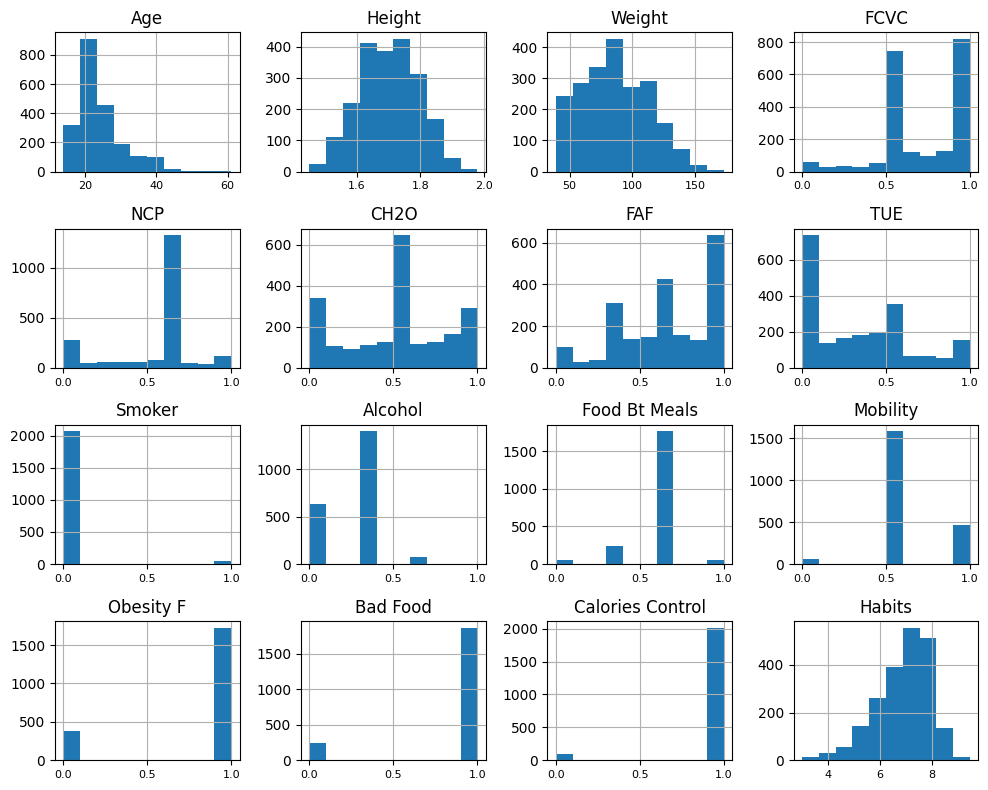

In [257]:
df.hist(figsize=(10,8), xlabelsize=8)
plt.tight_layout()

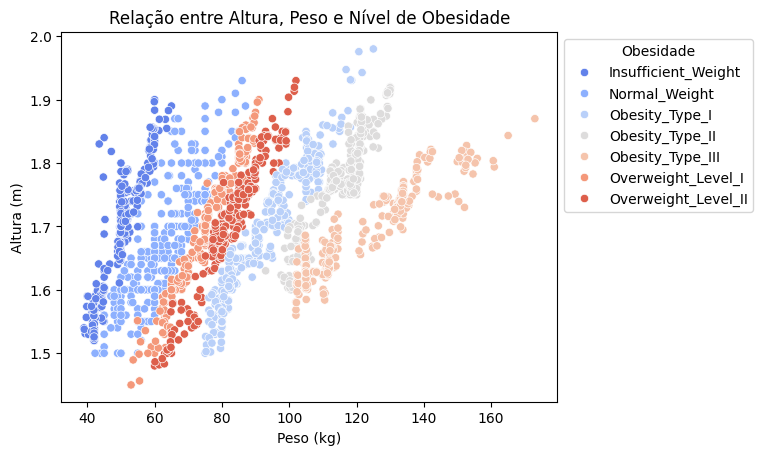

In [272]:
# Relação entre altura x peso
sns.scatterplot(x='Weight', y='Height', data=df, hue='NObeyesdad', palette='coolwarm', hue_order=sorted(df['NObeyesdad'].unique()))
plt.title('Relação entre Altura, Peso e Nível de Obesidade')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.legend(loc='upper left', title='Obesidade', bbox_to_anchor=(1,1))
plt.show()


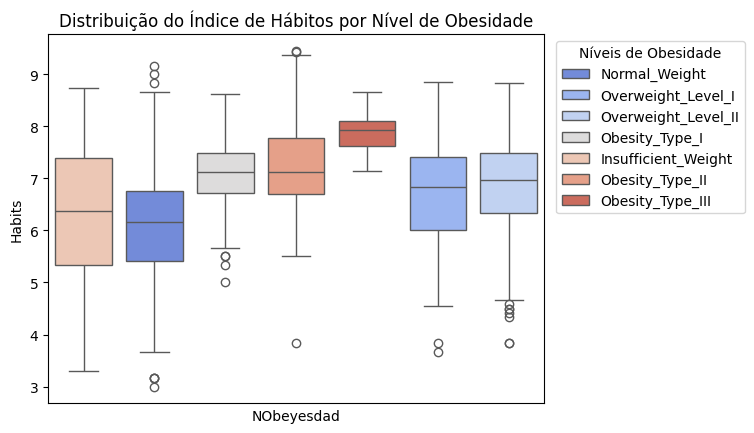

In [270]:
# Distribuição entre níveis de obesidade e hábitos
sns.boxplot(x='NObeyesdad', y='Habits', hue='NObeyesdad', legend=False, data=df, order=sorted(df['NObeyesdad'].unique()), palette='coolwarm')
plt.title('Distribuição do Índice de Hábitos por Nível de Obesidade')
plt.xticks([])
plt.legend(title='Níveis de Obesidade', labels=df['NObeyesdad'].unique(), bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

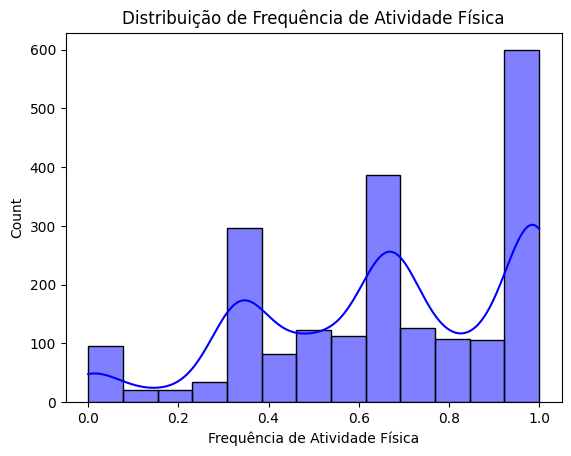

In [260]:
# Frequência de atividade física
# valores variando a cada 0,25: Não pratica, 1-2 dias, 2-4 dias, 4-5 dias)
sns.histplot(df['FAF'], kde=True, color='blue')
plt.title('Distribuição de Frequência de Atividade Física')
plt.xlabel('Frequência de Atividade Física')
plt.show()


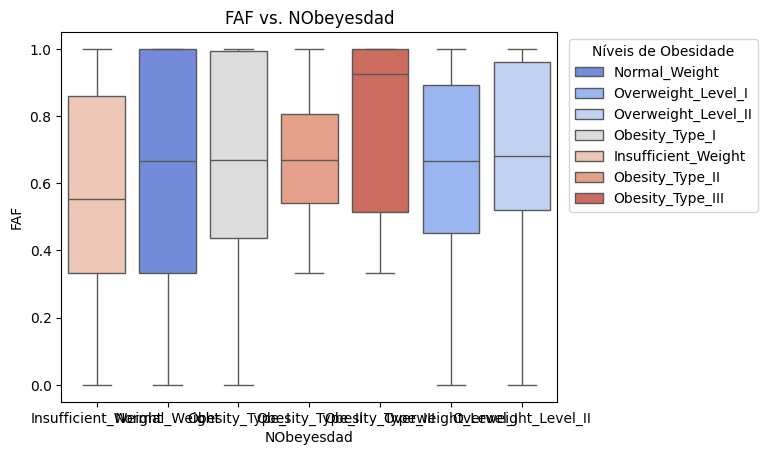

In [ ]:
# Relação entre FAF e NObeyesdad
sns.boxplot(x='NObeyesdad', y='FAF', hue='NObeyesdad', legend=False, data=df, order=sorted(df['NObeyesdad'].unique()), palette='coolwarm')
plt.title('FAF vs. NObeyesdad')
plt.xticks([])
plt.legend(title='Níveis de Obesidade', labels=df['NObeyesdad'].unique(), bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()





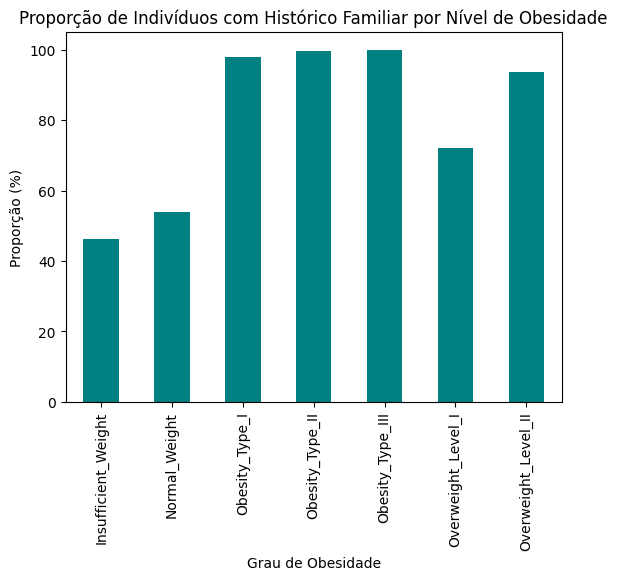

In [262]:
# Proporção por grupo de obesidade
family_history = df.groupby('NObeyesdad')['Obesity F'].mean().mul(100)

family_history.plot(kind='bar', color='teal')
plt.title('Proporção de Indivíduos com Histórico Familiar por Nível de Obesidade')
plt.ylabel('Proporção (%)',)
plt.xlabel('Grau de Obesidade')
plt.show()

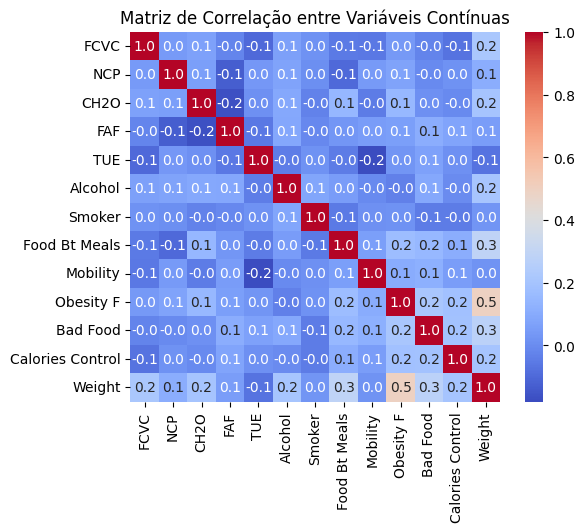

In [263]:
# Validando se há correlação entre as variáveis
# Adicionando as variávies peso ao df de variáveis contínuas

continuous_vars.append('Weight')

correlation_matrix = df[continuous_vars].corr()

# Heatmap
#Grau de correção: 0.1 a 0.3 fraca; 0.3 a 0.5 moderada; 0.5 a 1 forte
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)
plt.title('Matriz de Correlação entre Variáveis Contínuas')
plt.show()